
🧠 Evaluating Naive Bayes Models...

--- GaussianNB ---
Accuracy: 81.01%
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       126
           1       0.69      0.66      0.67        53

    accuracy                           0.81       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.81      0.81      0.81       179

------------------------------------------------------------
--- MultinomialNB ---
Accuracy: 81.56%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       126
           1       0.71      0.64      0.67        53

    accuracy                           0.82       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.81      0.82      0.81       179

------------------------------------------------------------
--- BernoulliNB ---
Accuracy: 77.09%
              precision    recall  f1-score   support

           0       0

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


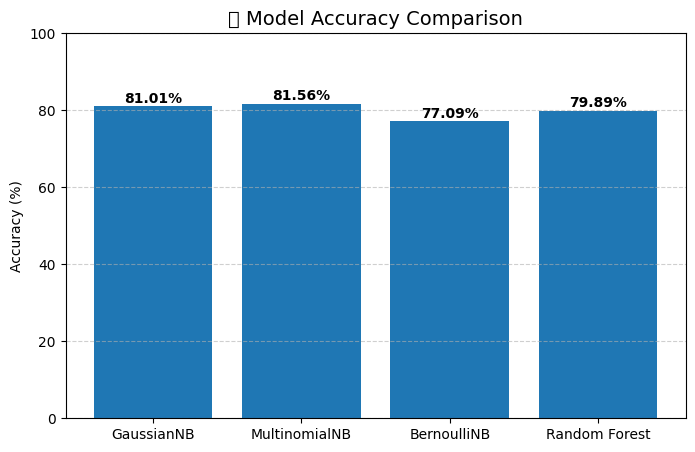


✅ MultinomialNB usually performs best for text (word counts).
✅ BernoulliNB performs well with binary word presence.
🌳 Random Forest can improve results slightly but runs slower.
🎯 Expect MultinomialNB ≈ 81–82% accuracy.


In [ ]:
# 💬 Google Play Store Sentiment Classifier
# by Tenika Powell 🧠✨

# ============================================================
# 1️⃣ Import Libraries
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ============================================================
# 2️⃣ Load and Clean Dataset
# ============================================================
url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"
df = pd.read_csv(url)

# Keep only the needed columns
df = df[["review", "polarity"]].dropna()

# Clean text: strip spaces + lowercase
df["review"] = df["review"].str.strip().str.lower()

# ============================================================
# 3️⃣ Split Data into Train and Test
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    df["review"],
    df["polarity"],
    test_size=0.2,
    random_state=42
)

# ============================================================
# 4️⃣ Vectorize Text (Convert Words → Numbers)
# ============================================================
# binary=True lets BernoulliNB work correctly
vec = CountVectorizer(stop_words="english", binary=True)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

# ============================================================
# 5️⃣ Train & Evaluate Naive Bayes Models
# ============================================================
models = {
    "GaussianNB": GaussianNB(),      # needs dense data
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
}

print("\n🧠 Evaluating Naive Bayes Models...\n")

accuracies = {}

# GaussianNB requires dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

for name, model in models.items():
    print(f"--- {name} ---")
    if name == "GaussianNB":
        model.fit(X_train_dense, y_train)
        preds = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds) * 100
    accuracies[name] = acc
    print(f"Accuracy: {acc:.2f}%")
    print(classification_report(y_test, preds))
    print("-" * 60)

# ============================================================
# 6️⃣ Random Forest Comparison
# ============================================================
print("\n🌳 Random Forest Comparison...\n")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_dense, y_train)
rf_preds = rf.predict(X_test_dense)

rf_acc = accuracy_score(y_test, rf_preds) * 100
accuracies["Random Forest"] = rf_acc

print(f"Accuracy: {rf_acc:.2f}%")
print(classification_report(y_test, rf_preds))
print("-" * 60)

# ============================================================
# 7️⃣ Summary Table
# ============================================================
print("\n📊 Model Accuracy Summary\n")
for name, acc in accuracies.items():
    print(f"{name:<15} ➜ {acc:.2f}%")

# ============================================================
# 8️⃣ Visualize Accuracies (Bar Chart)
# ============================================================
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values())
plt.title("📈 Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add accuracy labels on top of each bar
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=10, weight='bold')
%matplotlib inline
plt.show()

# ============================================================
# 9️⃣ Summary Notes
# ============================================================
print("\n✅ MultinomialNB usually performs best for text (word counts).")
print("✅ BernoulliNB performs well with binary word presence.")
print("🌳 Random Forest can improve results slightly but runs slower.")
print("🎯 Expect MultinomialNB ≈ 81–82% accuracy.")




